In [1]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

try:
    os.chdir("./Resources")
except:
    pass

/Library/Python/2.7/site-packages/librosa/core/audio.py:33: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [4]:
y, sr = librosa.load('./single-snare-3.wav')
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

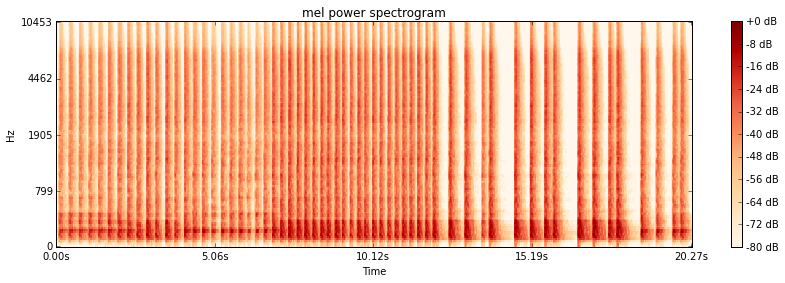

In [5]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [6]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 875.0, 0.0, 36.346677406541417)

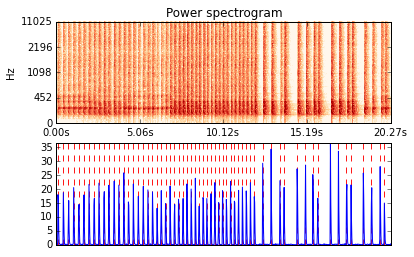

In [7]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [9]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[  6.75739648e-05   1.94146414e-05   4.89206650e-05 ...,   4.86021489e-02
   8.56136680e-02   1.19220309e-01]
[  5.57042185e-05   2.48618799e-05   3.08586750e-05 ...,   1.05225660e-01
   4.75461036e-02   1.24114610e-01]
[  1.97631052e-05   3.72717222e-05   1.95650409e-05 ...,   2.18577939e-03
   7.87892193e-03   9.07440577e-03]
[  1.90821927e-04   4.54667897e-05   6.19150596e-05 ...,   1.03946410e-01
   7.62836710e-02   1.70642172e-03]
[  2.38216981e-05   3.85039812e-06   7.38201779e-05 ...,   1.12147287e-01
   9.07362178e-02   8.52278322e-02]
[ 0.00317702  0.00273602  0.0025129  ...,  0.01650845  0.00717167
  0.00131105]
[  2.29419629e-06   1.27749133e-03   1.45802170e-03 ...,   4.84370589e-01
   3.34081680e-01   3.31131876e-01]
[ 0.00101611  0.00121991  0.00116332 ...,  0.74454266  0.37434849
  0.01671633]
[  1.03633654e-04   9.03676788e-04   2.14968179e-03 ...,   2.87527055e-01
   6.33198380e-01   5.88308215e-01]
[  5.62791829e-04   1.14669574e-05   1.72686530e-03 ...,   4.19191383e

In [10]:
filename = raw_input()
with open('../Data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 

snareFrames3.csv
